In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.formula.api as smf

%matplotlib inline

In [8]:
DC_properties = pd.read_csv("datasets/DC_Properties.csv")
DC_properties.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [9]:
DC_properties.shape

(158957, 49)

In [10]:
DC_properties.drop(['STRUCT', 'STORIES', 'NUM_UNITS',
                       'Unnamed: 0', 'SALE_NUM','QUALIFIED','BLDG_NUM',
                       'STYLE', 'LATITUDE', 'LONGITUDE',
                   'X', 'Y', 'WARD', 'SQUARE',
                   'CENSUS_BLOCK', 'EXTWALL', 'ROOF', 'INTWALL',
                    'CENSUS_TRACT', 'ASSESSMENT_NBHD', 'LIVING_GBA',
                    'ASSESSMENT_SUBNBHD', 'GIS_LAST_MOD_DTTM',
                   'HEAT', 'USECODE', 'LANDAREA', 'FULLADDRESS', 'CMPLX_NUM', 'NATIONALGRID'],
                   axis=1, inplace = True)

In [11]:
DC_properties.columns

Index(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'PRICE', 'GBA', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT'],
      dtype='object')

In [12]:
DC_properties.describe()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,GBA,KITCHENS,FIREPLACES,ZIPCODE
count,158957.000000,158957.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,9.821600e+04,106696.000000,106695.000000,158957.000000,158956.000000
mean,1.810678,0.458237,6.187736,2.732506,1941.987579,1998.243537,1963.718024,9.313516e+05,1714.539889,1.219251,2.374674,20012.694563
std,0.976396,0.587571,2.618165,1.358864,33.640234,16.575786,24.923150,7.061325e+06,880.677860,0.621170,737.295595,15.627084
min,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,1.000000e+00,0.000000,0.000000,0.000000,20001.000000
25%,1.000000,0.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.400000e+05,1190.000000,1.000000,0.000000,20007.000000
50%,2.000000,0.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,3.999990e+05,1480.000000,1.000000,0.000000,20011.000000
75%,2.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,6.520000e+05,1966.000000,1.000000,1.000000,20018.000000
max,14.000000,11.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,1.374275e+08,45384.000000,44.000000,293920.000000,20392.000000


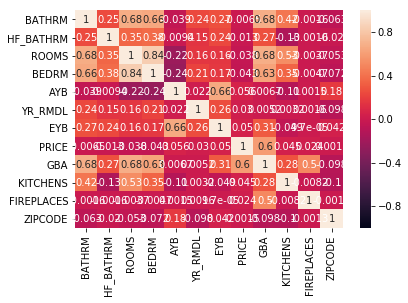

In [13]:
corr = DC_properties.corr()

sns.heatmap(corr, vmin=-1, annot=True)

In [14]:
DC_price = DC_properties[DC_properties['PRICE'].notnull()]
DC_price.shape

(98216, 20)

In [15]:
DC_realRM_price = DC_price[(DC_price['BEDRM']!= 0) &
                           (DC_price['BEDRM']<= 8) &
                           (DC_price['PRICE']!= 0) &
                          (DC_price['PRICE']<1500000) &
                          (DC_price['BATHRM']!= 0) &
                        (DC_price['BATHRM']<= 6)]
DC_realRM_price.shape

(90589, 20)

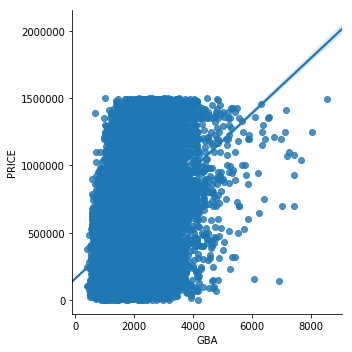

In [16]:
sns.lmplot(x='GBA', y='PRICE', data=DC_realRM_price)

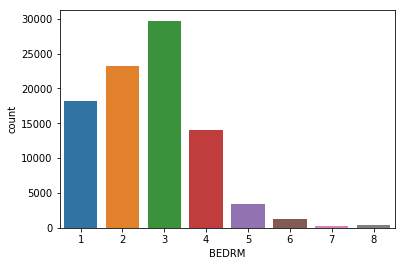

In [218]:
sns.countplot(x='BEDRM',data=DC_realRM_price)

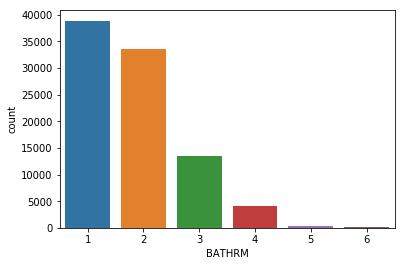

In [219]:
sns.countplot(x='BATHRM',data=DC_realRM_price)

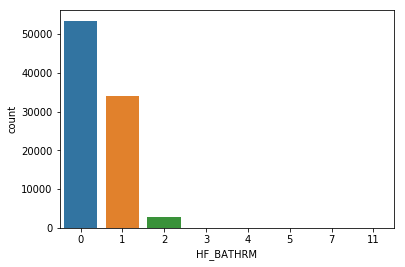

In [220]:
sns.countplot(x='HF_BATHRM',data=DC_realRM_price)

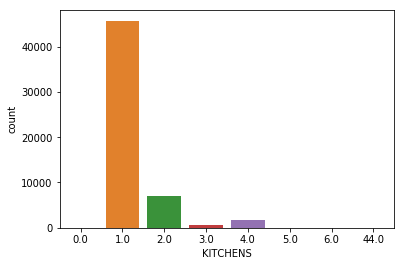

In [221]:
sns.countplot(x='KITCHENS',data=DC_realRM_price)

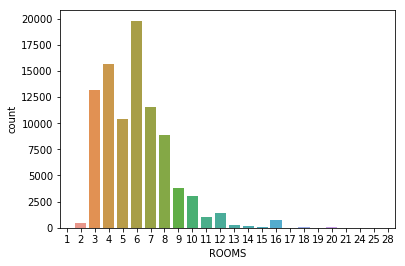

In [222]:
sns.countplot(x='ROOMS',data=DC_realRM_price)

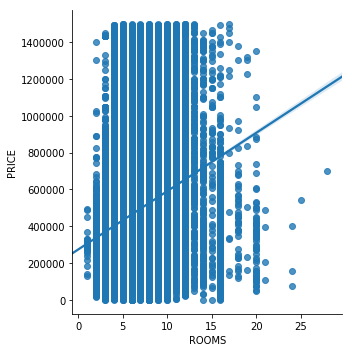

In [223]:
sns.lmplot(x='ROOMS', y='PRICE', data=DC_realRM_price)

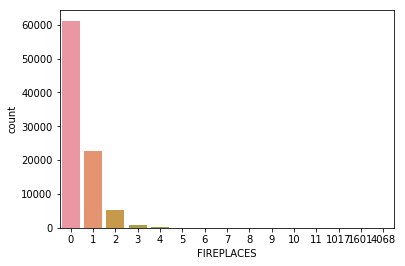

In [224]:
sns.countplot(x='FIREPLACES',data=DC_realRM_price)

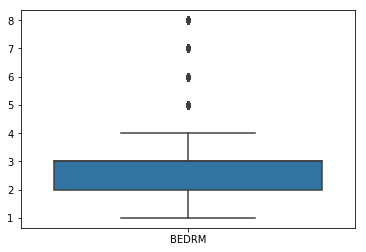

In [17]:
bedrm_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'PRICE', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=bedrm_df)

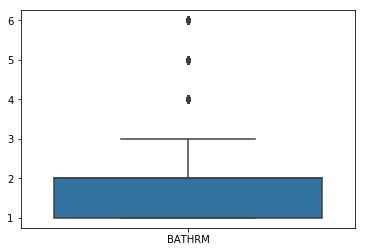

In [18]:
bathrm_df = DC_realRM_price.drop(['PRICE', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=bathrm_df)

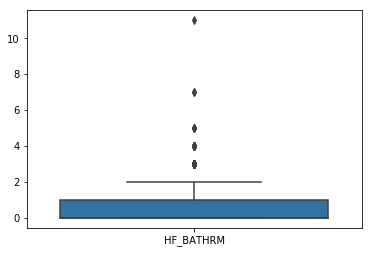

In [19]:
hfbathrm_df = DC_realRM_price.drop(['PRICE', 'BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=hfbathrm_df)

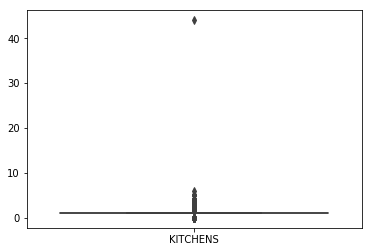

In [20]:
kitchens_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'PRICE', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=kitchens_df)

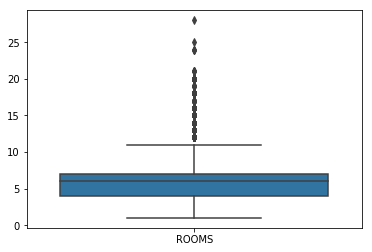

In [21]:
rooms_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'PRICE', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=rooms_df)

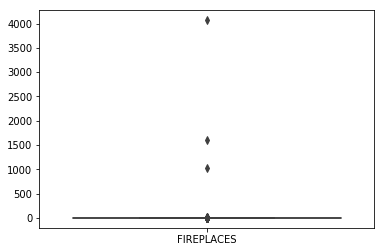

In [23]:
fireplaces_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'PRICE',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=fireplaces_df)

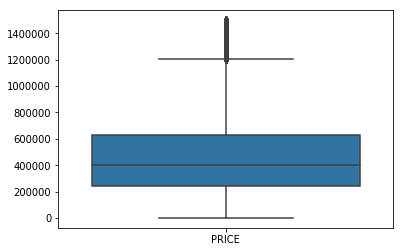

In [24]:
price_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'GBA'],
                   axis=1)
sns.boxplot(data=price_df)

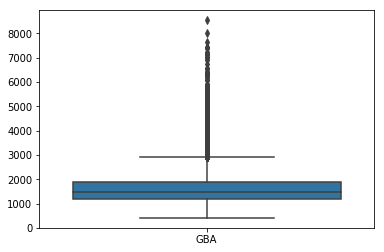

In [25]:
GBA_df = DC_realRM_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'PRICE'],
                   axis=1)
sns.boxplot(data=GBA_df)

In [26]:
DC_realRM2_price = DC_realRM_price[DC_realRM_price['GBA'].notnull()]
DC_realRM2_price.shape

(55086, 20)

In [27]:
DC_real_Count_price = DC_realRM2_price[(DC_realRM2_price['BEDRM']!= 0) &
                           (DC_realRM2_price['BEDRM']<= 4) &
                           (DC_realRM2_price['PRICE']!= 0) &
                            (DC_realRM2_price['PRICE']>=234000) &
                          (DC_realRM2_price['PRICE']<1200000) &
                           (DC_realRM2_price['KITCHENS']!=0) &
                           (DC_realRM2_price['KITCHENS']<=4) &
                            (DC_realRM2_price['FIREPLACES']<=3) &
                           (DC_realRM2_price['BATHRM']!= 0) &
                            (DC_realRM2_price['BATHRM']<= 3) &
                            (DC_realRM2_price['HF_BATHRM']<= 2) &
                            (DC_realRM2_price['GBA']>= 1100) &
                            (DC_realRM2_price['GBA']<= 2000)]
DC_real_Count_price.shape

(24001, 20)

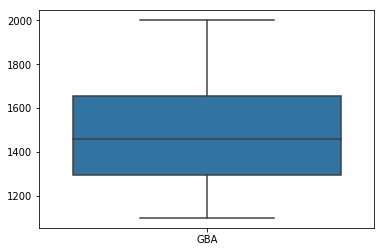

In [28]:
GBA2_df = DC_real_Count_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT', 'PRICE'],
                   axis=1)
sns.boxplot(data=GBA2_df)

In [29]:
DC_real_Count_price.describe()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,GBA,KITCHENS,FIREPLACES,ZIPCODE
count,24001.000000,24001.000000,24001.000000,24001.000000,23975.000000,14539.000000,24001.000000,2.400100e+04,24001.000000,24001.000000,24001.000000,24001.000000
mean,2.039748,0.704637,6.908004,3.159785,1934.439583,2005.166174,1971.216991,5.575819e+05,1484.820007,1.137703,0.550894,20010.639307
std,0.717811,0.556296,1.290137,0.594146,32.423672,20.427968,17.207072,2.245460e+05,229.418268,0.359623,0.681728,7.319297
min,1.000000,0.000000,2.000000,1.000000,1776.000000,20.000000,1940.000000,2.340000e+05,1100.000000,1.000000,0.000000,20001.000000
25%,2.000000,0.000000,6.000000,3.000000,1912.000000,2003.000000,1961.000000,3.630000e+05,1296.000000,1.000000,0.000000,20003.000000
50%,2.000000,1.000000,7.000000,3.000000,1927.000000,2009.000000,1967.000000,5.250000e+05,1460.000000,1.000000,0.000000,20011.000000
75%,3.000000,1.000000,8.000000,4.000000,1942.000000,2013.000000,1975.000000,7.280000e+05,1653.000000,1.000000,1.000000,20017.000000
max,3.000000,2.000000,16.000000,4.000000,2018.000000,2018.000000,2018.000000,1.199000e+06,2000.000000,4.000000,3.000000,20052.000000


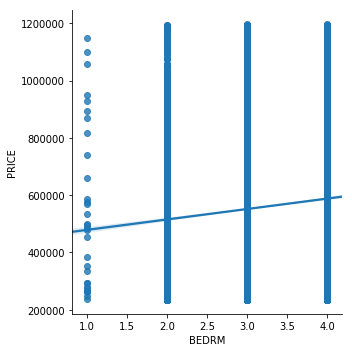

In [30]:
sns.lmplot(x='BEDRM', y='PRICE', data=DC_real_Count_price)

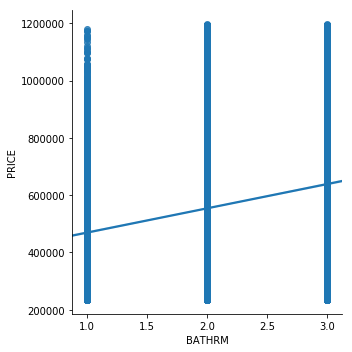

In [31]:
sns.lmplot(x='BATHRM', y='PRICE', data=DC_real_Count_price)

In [43]:
DC_real_Count_price.corr()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,GBA,KITCHENS,FIREPLACES,ZIPCODE
BATHRM,1.000000,-0.007641,0.297526,0.326269,0.170206,0.138184,0.317581,0.271060,0.250797,0.213325,0.060662,0.026410
HF_BATHRM,-0.007641,1.000000,0.082256,0.041439,0.202501,0.033977,0.293615,0.081686,0.169388,-0.063487,0.071775,0.083186
ROOMS,0.297526,0.082256,1.000000,0.390766,0.041802,0.028540,0.048216,0.105652,0.252396,0.156356,0.055919,0.028313
BEDRM,0.326269,0.041439,0.390766,1.000000,-0.001093,0.073083,0.015882,0.096359,0.277365,0.148772,-0.011282,0.035051
AYB,0.170206,0.202501,0.041802,-0.001093,1.000000,0.069636,0.748405,-0.211208,0.009171,-0.182058,-0.124712,0.518627
YR_RMDL,0.138184,0.033977,0.028540,0.073083,0.069636,1.000000,0.166860,0.052530,-0.032276,-0.018553,-0.108819,0.034601
EYB,0.317581,0.293615,0.048216,0.015882,0.748405,0.166860,1.000000,0.056928,0.110419,-0.076189,-0.079842,0.274663
PRICE,0.271060,0.081686,0.105652,0.096359,-0.211208,0.052530,0.056928,1.000000,0.234426,0.111474,0.267892,-0.269562
GBA,0.250797,0.169388,0.252396,0.277365,0.009171,-0.032276,0.110419,0.234426,1.000000,0.047306,0.260070,0.012577
KITCHENS,0.213325,-0.063487,0.156356,0.148772,-0.182058,-0.018553,-0.076189,0.111474,0.047306,1.000000,0.028093,-0.196777


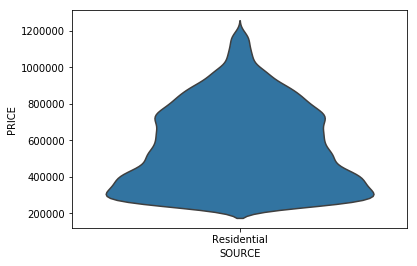

In [33]:
sns.violinplot(x='SOURCE', y='PRICE', data=DC_real_Count_price, inner=None)

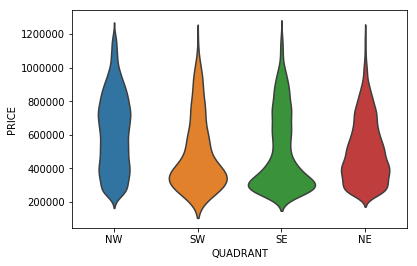

In [34]:
sns.violinplot(x='QUADRANT',y='PRICE', data=DC_real_Count_price, inner=None)

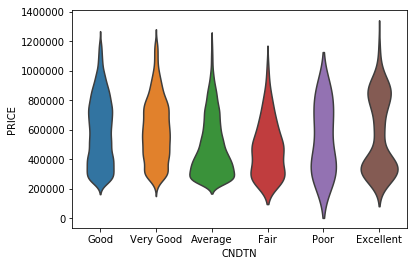

In [35]:
sns.violinplot(x='CNDTN',y='PRICE', data=DC_real_Count_price, inner=None)

In [36]:
result = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + CNDTN',
                 data=DC_real_Count_price).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     540.2
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:58:23   Log-Likelihood:            -3.2758e+05
No. Observations:               24001   AIC:                         6.552e+05
Df Residuals:                   23991   BIC:                         6.553e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.741e+05   8048.964     34.050      0.000    2.58e+05     2.9e+05
CNDTN[T.Excellent]  8.597e+04   1.04e+04      8.237      0.000    6.55e+04    1.06e+05
CNDTN[T.Fair]       2965.9289   1.72e+04      0.172      0.863   -3.08e+04    3.67e+04
CNDTN[T.Good]       8.023e+04   3045.055     26.347      0.000    7.43e+04    8.62e+04
CNDTN[T.Poor]       1.109e+05   4.37e+04      2.536      0.011    2.52e+04    1.97e+05
CNDTN[T.Very Good]   9.81e+04   4480.900     21.893      0.000    8.93e+04    1.07e+05
BEDRM               6834.2340   2365.837      2.889      0.004    2197.045    1.15e+04
BATHRM               5.55e+04   2125.442     26.114      0.000    5.13e+04    5.97e+04
FIREPLACES          8.591e+04   1984.176     43.295      0.000     8.2e+04    8.98e+04
KITCHENS            4.044e+04   3808.561     10.617      0.000     3.3e+04    4.79e+04
==============================================================================
Omnibus:                      831.708   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.907
Skew:                           0.350   Prob(JB):                    2.32e-153
Kurtosis:                       2.539   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result_2 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + CNDTN + AYB + EYB + YR_RMDL',
                 data=DC_real_Count_price).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     417.0
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:58:24   Log-Likelihood:            -1.9738e+05
No. Observations:               14527   AIC:                         3.948e+05
Df Residuals:                   14514   BIC:                         3.949e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.333e+06   4.05e+05    -15.641      0.000   -7.13e+06   -5.54e+06
CNDTN[T.Excellent]  1.884e+05    4.7e+04      4.013      0.000    9.64e+04     2.8e+05
CNDTN[T.Fair]      -8766.2964   4.83e+04     -0.182      0.856   -1.03e+05    8.59e+04
CNDTN[T.Good]       5.143e+04   4112.516     12.505      0.000    4.34e+04    5.95e+04
CNDTN[T.Poor]       -1.86e+04   1.93e+05     -0.097      0.923   -3.96e+05    3.59e+05
CNDTN[T.Very Good]  1.106e+05   6031.609     18.332      0.000    9.87e+04    1.22e+05
BEDRM               5125.1336   2784.237      1.841      0.066    -332.325    1.06e+04
BATHRM              5.192e+04   2590.690     20.040      0.000    4.68e+04     5.7e+04
FIREPLACES          7.237e+04   2335.150     30.991      0.000    6.78e+04    7.69e+04
KITCHENS            7135.9355   4220.157      1.691      0.091   -1136.110    1.54e+04
AYB                -2855.7169     85.063    -33.572      0.000   -3022.450   -2688.983
EYB                 6210.5270    203.724     30.485      0.000    5811.201    6609.853
YR_RMDL              -14.3673     81.444     -0.176      0.860    -174.008     145.274
==============================================================================
Omnibus:                      184.372   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.752
Skew:                           0.242   Prob(JB):                     2.52e-39
Kurtosis:                       2.757   Cond. No.                     8.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
result_3 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + CNDTN + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     417.0
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:58:24   Log-Likelihood:            -1.9738e+05
No. Observations:               14527   AIC:                         3.948e+05
Df Residuals:                   14514   BIC:                         3.949e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CNDTN[Average]   -6.333e+06   4.05e+05    -15.641      0.000   -7.13e+06   -5.54e+06
CNDTN[Excellent] -6.145e+06    4.1e+05    -14.980      0.000   -6.95e+06   -5.34e+06
CNDTN[Fair]      -6.342e+06   4.06e+05    -15.608      0.000   -7.14e+06   -5.55e+06
CNDTN[Good]      -6.282e+06   4.06e+05    -15.473      0.000   -7.08e+06   -5.49e+06
CNDTN[Poor]      -6.352e+06   4.48e+05    -14.178      0.000   -7.23e+06   -5.47e+06
CNDTN[Very Good] -6.223e+06   4.06e+05    -15.313      0.000   -7.02e+06   -5.43e+06
BEDRM             5125.1336   2784.237      1.841      0.066    -332.325    1.06e+04
BATHRM            5.192e+04   2590.690     20.040      0.000    4.68e+04     5.7e+04
FIREPLACES        7.237e+04   2335.150     30.991      0.000    6.78e+04    7.69e+04
KITCHENS          7135.9355   4220.157      1.691      0.091   -1136.110    1.54e+04
AYB              -2855.7169     85.063    -33.572      0.000   -3022.450   -2688.983
EYB               6210.5270    203.724     30.485      0.000    5811.201    6609.853
YR_RMDL            -14.3673     81.444     -0.176      0.860    -174.008     145.274
==============================================================================
Omnibus:                      184.372   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.752
Skew:                           0.242   Prob(JB):                     2.52e-39
Kurtosis:                       2.757   Cond. No.                     2.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
result_4 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.967e+04
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:58:24   Log-Likelihood:            -1.9777e+05
No. Observations:               14527   AIC:                         3.956e+05
Df Residuals:                   14520   BIC:                         3.956e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BEDRM       7245.3841   2856.536      2.536      0.011    1646.210    1.28e+04
BATHRM      7.471e+04   2525.224     29.584      0.000    6.98e+04    7.97e+04
FIREPLACES  6.765e+04   2371.987     28.522      0.000     6.3e+04    7.23e+04
KITCHENS   -7589.8066   4300.002     -1.765      0.078    -1.6e+04     838.746
AYB        -3379.1704     85.133    -39.693      0.000   -3546.042   -3212.298
EYB         3764.5528    112.688     33.407      0.000    3543.671    3985.435
YR_RMDL     -263.4491     79.487     -3.314      0.001    -419.255    -107.644
==============================================================================
Omnibus:                      140.664   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.463
Skew:                           0.204   Prob(JB):                     1.04e-29
Kurtosis:                       2.767   Cond. No.                     9.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
result_5 = smf.ols('PRICE ~ BEDRM + BATHRM + FIREPLACES + KITCHENS + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.967e+04
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:58:25   Log-Likelihood:            -1.9777e+05
No. Observations:               14527   AIC:                         3.956e+05
Df Residuals:                   14520   BIC:                         3.956e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BEDRM       7245.3841   2856.536      2.536      0.011    1646.210    1.28e+04
BATHRM      7.471e+04   2525.224     29.584      0.000    6.98e+04    7.97e+04
FIREPLACES  6.765e+04   2371.987     28.522      0.000     6.3e+04    7.23e+04
KITCHENS   -7589.8066   4300.002     -1.765      0.078    -1.6e+04     838.746
AYB        -3379.1704     85.133    -39.693      0.000   -3546.042   -3212.298
EYB         3764.5528    112.688     33.407      0.000    3543.671    3985.435
YR_RMDL     -263.4491     79.487     -3.314      0.001    -419.255    -107.644
==============================================================================
Omnibus:                      140.664   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.463
Skew:                           0.204   Prob(JB):                     1.04e-29
Kurtosis:                       2.767   Cond. No.                     9.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
result_6 = smf.ols('PRICE ~ BATHRM + FIREPLACES + KITCHENS + AYB + EYB + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.293e+04
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:58:25   Log-Likelihood:            -1.9777e+05
No. Observations:               14527   AIC:                         3.956e+05
Df Residuals:                   14521   BIC:                         3.956e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BATHRM      7.694e+04   2366.592     32.512      0.000    7.23e+04    8.16e+04
FIREPLACES  6.732e+04   2368.731     28.420      0.000    6.27e+04     7.2e+04
KITCHENS   -6237.0563   4267.598     -1.461      0.144   -1.46e+04    2127.979
AYB        -3358.3855     84.754    -39.625      0.000   -3524.514   -3192.257
EYB         3748.6400    112.534     33.311      0.000    3528.059    3969.221
YR_RMDL     -259.2914     79.485     -3.262      0.001    -415.093    -103.490
==============================================================================
Omnibus:                      141.529   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.290
Skew:                           0.205   Prob(JB):                     6.91e-30
Kurtosis:                       2.767   Cond. No.                     8.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
result_7 = smf.ols('PRICE ~ BATHRM + FIREPLACES + AYB + EYB + GBA + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.320e+04
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:58:25   Log-Likelihood:            -1.9770e+05
No. Observations:               14527   AIC:                         3.954e+05
Df Residuals:                   14521   BIC:                         3.955e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BATHRM      6.942e+04   2356.382     29.460      0.000    6.48e+04     7.4e+04
FIREPLACES  5.974e+04   2433.319     24.552      0.000     5.5e+04    6.45e+04
AYB        -3255.9562     83.594    -38.949      0.000   -3419.812   -3092.101
EYB         3553.9886    111.608     31.843      0.000    3335.222    3772.755
GBA           93.8282      7.568     12.399      0.000      78.995     108.661
YR_RMDL     -229.2949     79.086     -2.899      0.004    -384.313     -74.277
==============================================================================
Omnibus:                      110.495   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.430
Skew:                           0.163   Prob(JB):                     1.56e-22
Kurtosis:                       2.755   Cond. No.                     5.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis
Ideally an investor would be interested in residential houses (not condos) in the NW quadrant. Since "actual year built" has a negative coefficient and "last year an improvement was built" has a positive coefficient based on this model, an older house with more recent construction would sell for a higher price. Additionally, a bigger house based on the gross building area in square feet should also sell for a higher price.